In [7]:
import csv
import os
import pandas as pd

def ispisi_imena_kolona(csv_putanja):
    # Učitavanje CSV fajla
    with open(csv_putanja, mode='r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        
        # Uzimanje prvog reda koji sadrži imena kolona
        imena_kolona = next(csv_reader)
        
        # Ispisivanje imena kolona
        print("Imena kolona:")
        for ime_kolone in imena_kolona:
            print(ime_kolone)

# Putanja do CSV fajla
cwd = os.getcwd()
csv_fajl_putanja = os.path.abspath(os.path.join(cwd, os.pardir))
csv_fajl_putanja += '\Drzave\Srbija\povezivanje_sa_tsv_povezivanjeSrbija.csv'

# Pozivanje funkcije za ispisivanje imena kolona
ispisi_imena_kolona(csv_fajl_putanja)

Imena kolona:
Accession ID
Collection date
Submission date
Location
PozicijeRazlika



























































































































































































































































































































































































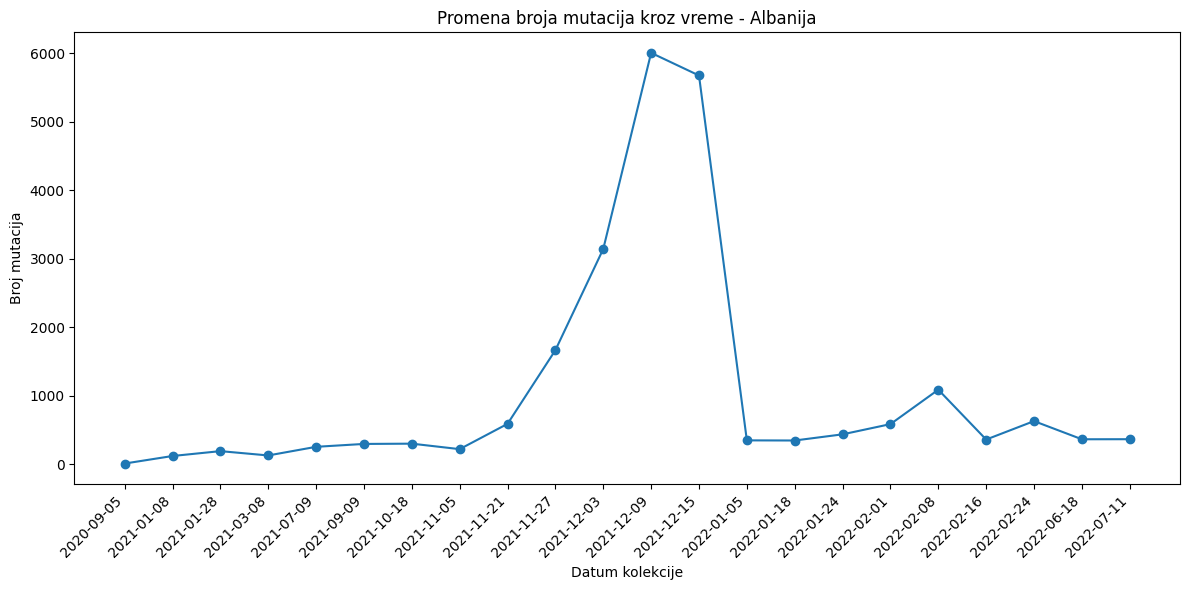

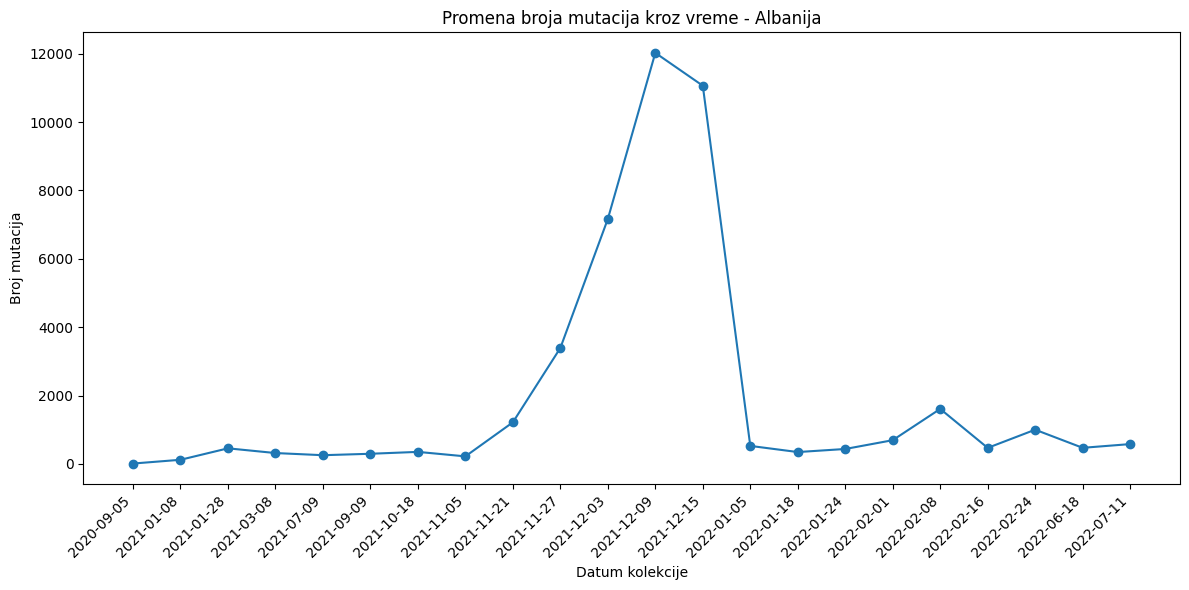

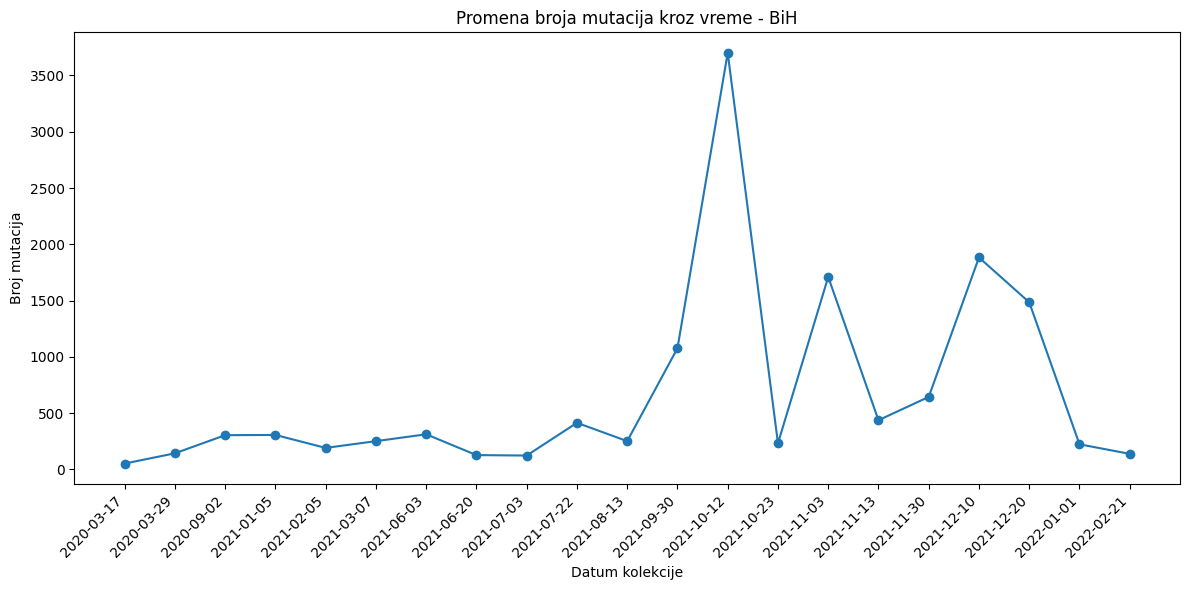

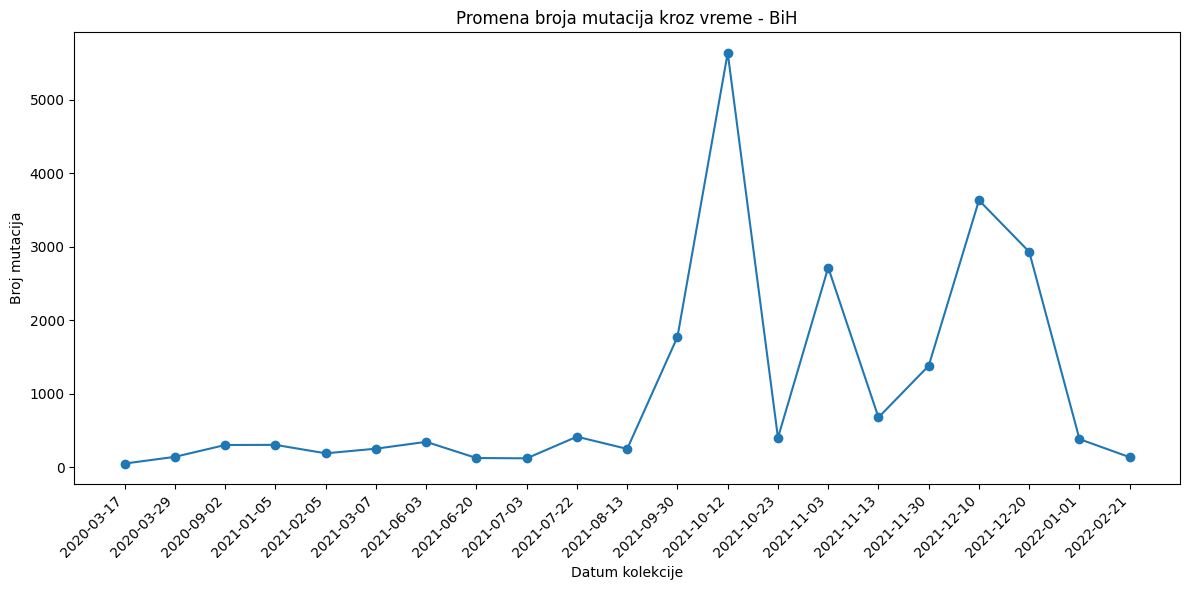

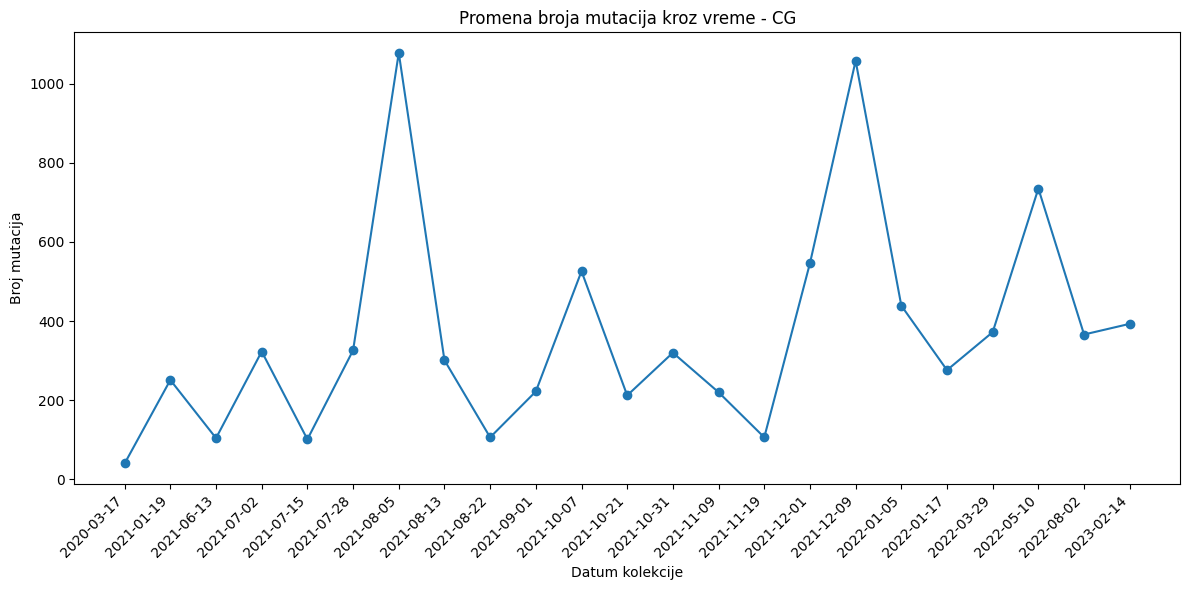

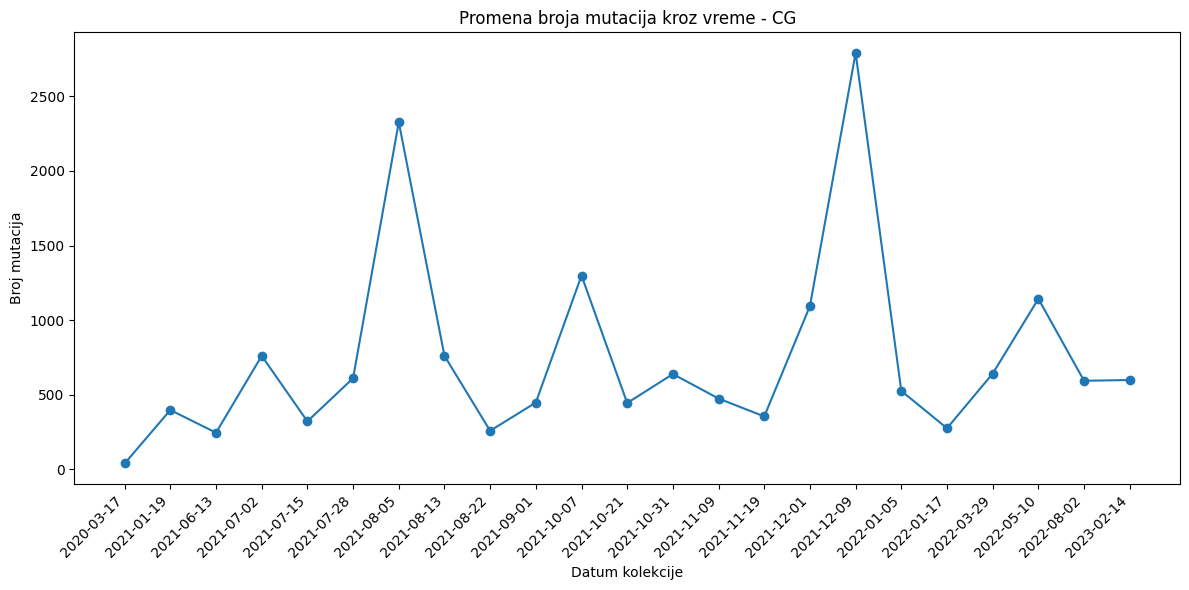

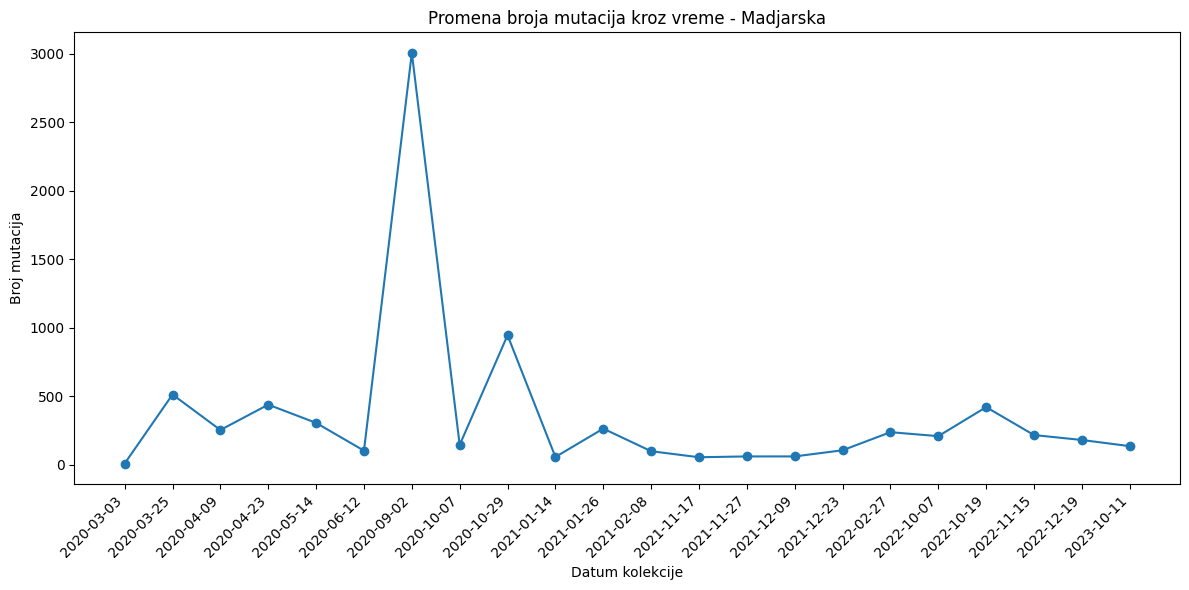

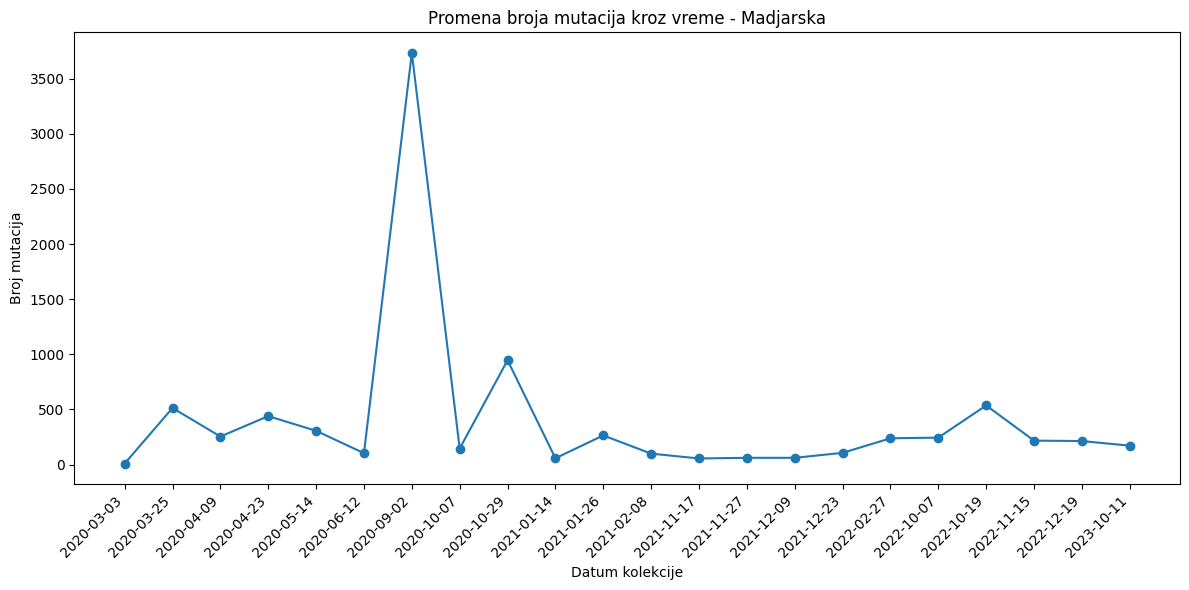

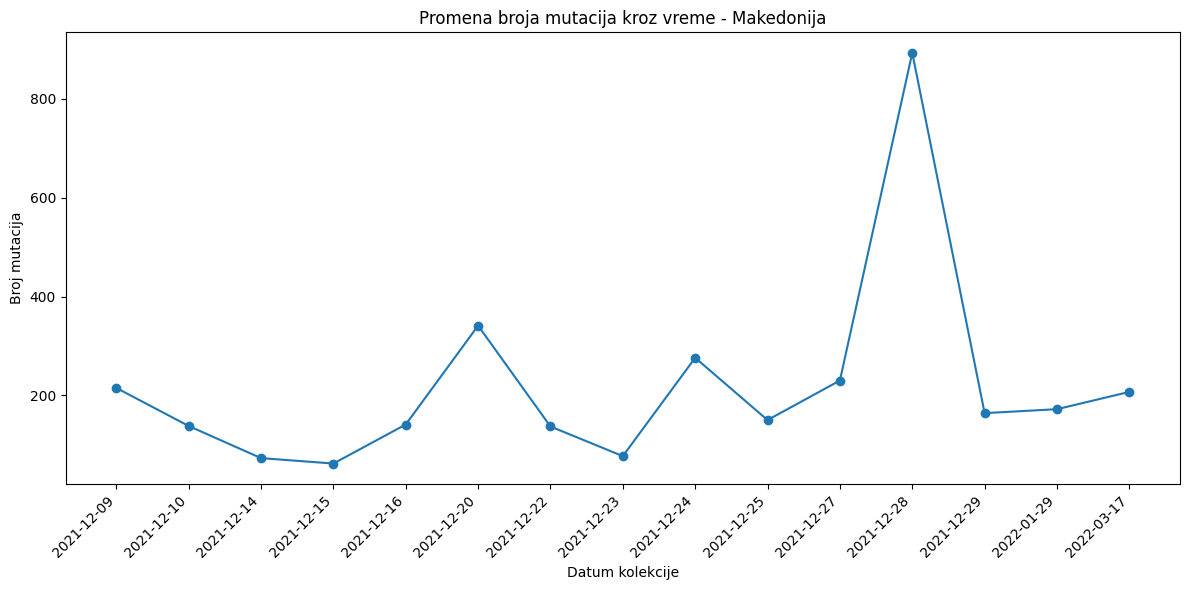

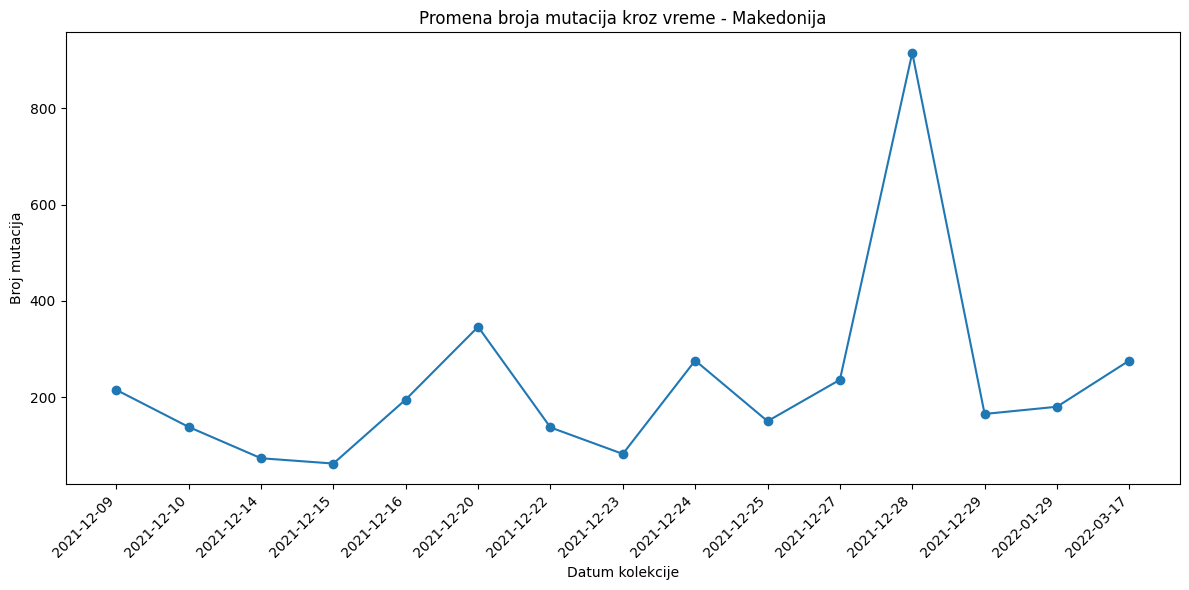

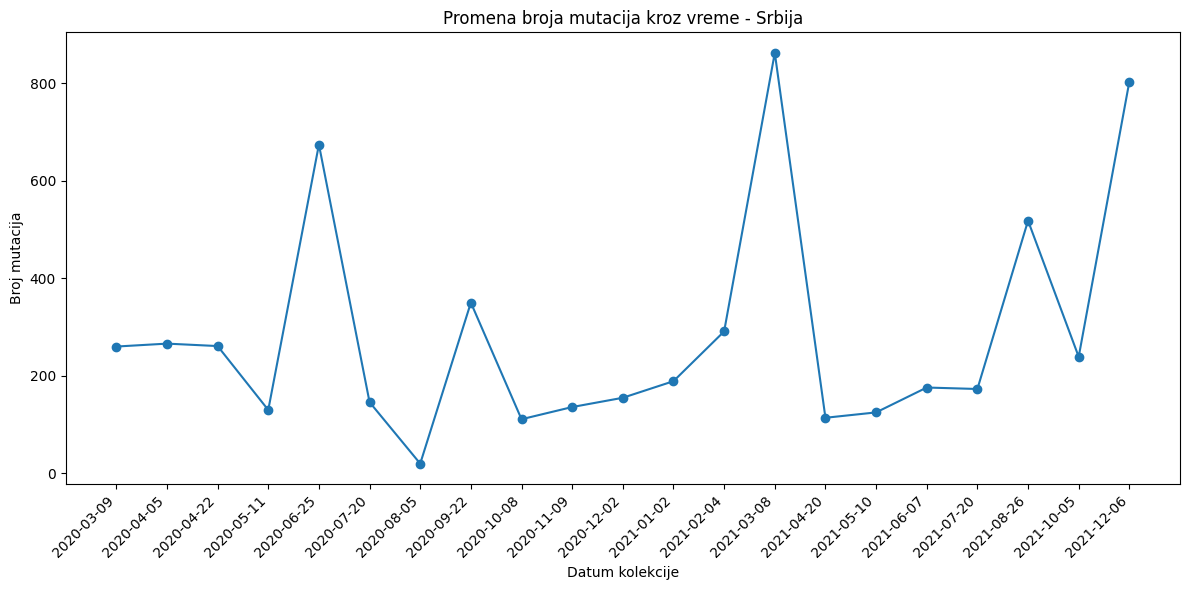

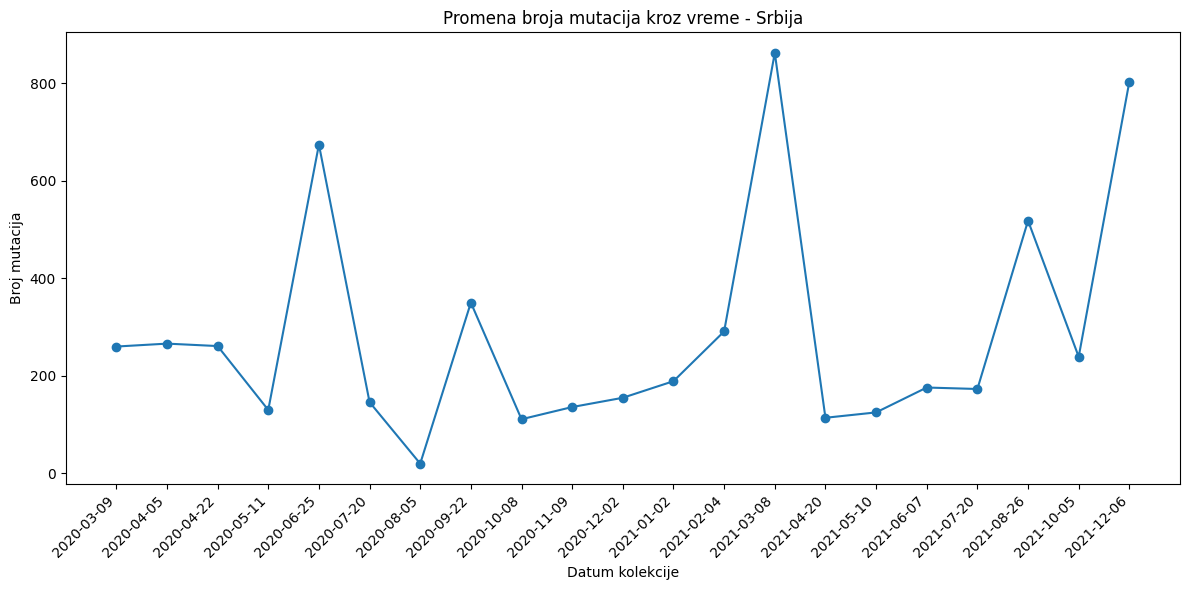

ZeroDivisionError: integer division or modulo by zero

<Figure size 1200x600 with 0 Axes>

In [30]:
import os
import csv
from dateutil import parser
import matplotlib.pyplot as plt

def analiziraj_promene_mutacija(csv_putanja, ime_poddirektorijuma):
    # Učitavanje CSV fajla
    with open(csv_putanja, mode='r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        zaglavlje = next(csv_reader)

        # Pronalaženje indeksa kolona
        datum_kolekcije_indeks = zaglavlje.index('Collection date')
        pozicije_mutacija = [pozicija for pozicija in zaglavlje[4:] if pozicija.startswith('Sekvenca')]

        # Čitanje i sortiranje podataka prema datumu kolekcije
        podaci = list(csv_reader)
        podaci.sort(key=lambda x: parser.parse(x[datum_kolekcije_indeks]))

        # Inicijalizacija strukture za praćenje broja mutacija po datumu
        mutacije_po_datumu = {}

        # Praćenje broja mutacija po datumu
        for red in podaci:
            datum_kolekcije = parser.parse(red[datum_kolekcije_indeks]).strftime('%Y-%m-%d')
            broj_mutacija = sum(1 for pozicija in red[4:] if pozicija != '0' and pozicija.isdigit())
            mutacije_po_datumu.setdefault(datum_kolekcije, []).append(broj_mutacija)

    # Vizualizacija promene broja mutacija kroz vreme
    datumi = list(mutacije_po_datumu.keys())
    broj_mutacija_po_datumu = [sum(mutacije_po_datumu[datum]) for datum in datumi]

    # Povećanje veličine slike
    plt.figure(figsize=(12, 6))

    # Određivanje broja datuma koje želimo prikazati
    broj_datuma = min(20, len(datumi))

    # Prikazivanje samo svakog drugog datuma
    koraci = max(len(datumi) // broj_datuma, 1)
    prikazani_datumi = datumi[::koraci]
    prikazani_brojevi_mutacija = broj_mutacija_po_datumu[::koraci]

    plt.plot(prikazani_datumi, prikazani_brojevi_mutacija, marker='o')

    plt.title(f'Promena broja mutacija kroz vreme - {ime_poddirektorijuma}')
    plt.xlabel('Datum kolekcije')
    plt.ylabel('Broj mutacija')
    plt.xticks(rotation=45, ha='right')

    # Poboljšanje rasporeda elemenata na grafu
    plt.tight_layout()

    # Prikazivanje grafika
    plt.show()

# Direktorijum "Balkan"
cwd = os.getcwd()
balkan_direktorijum = os.path.abspath(os.path.join(cwd, os.pardir))
balkan_direktorijum += '\Drzave'

# Iteriranje kroz poddirektorijume
for drzava_direktorijum in os.listdir(balkan_direktorijum):
    puna_putanja = os.path.join(balkan_direktorijum, drzava_direktorijum)
    if os.path.isdir(puna_putanja):
        for csv_fajl in os.listdir(puna_putanja):
            if csv_fajl.startswith("povezivanje_sa_tsv_") and csv_fajl.endswith(".csv"):
                csv_fajl_putanja = os.path.join(puna_putanja, csv_fajl)

                # Pozivanje funkcije za analizu i vizualizaciju promene broja mutacija
                analiziraj_promene_mutacija(csv_fajl_putanja, drzava_direktorijum)

ZeroDivisionError: integer division or modulo by zero

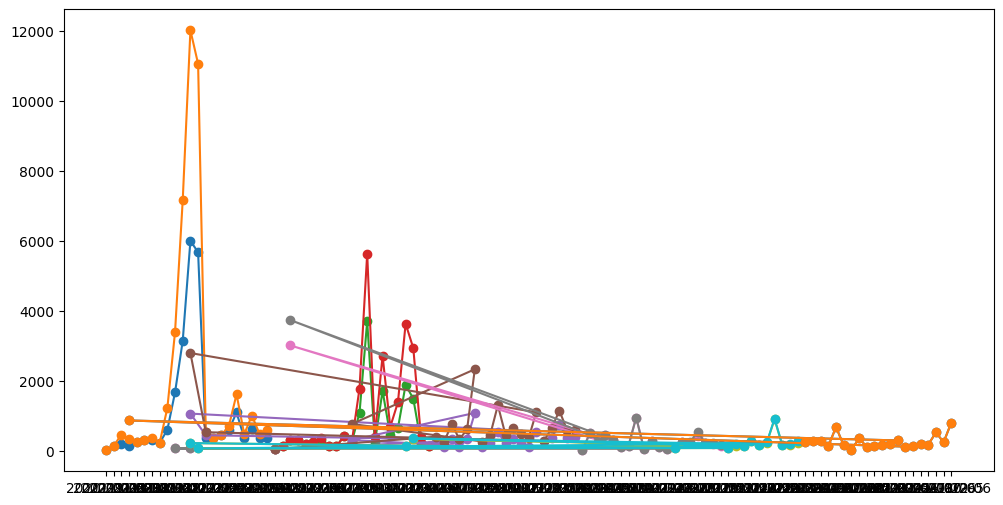

In [31]:
import os
import csv
from dateutil import parser
import matplotlib.pyplot as plt

def analiziraj_promene_mutacija(csv_putanja, ime_poddirektorijuma, ax=None):
    # Učitavanje CSV fajla
    with open(csv_putanja, mode='r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        zaglavlje = next(csv_reader)

        # Pronalaženje indeksa kolona
        datum_kolekcije_indeks = zaglavlje.index('Collection date')
        pozicije_mutacija = [pozicija for pozicija in zaglavlje[4:] if pozicija.startswith('Sekvenca')]

        # Čitanje i sortiranje podataka prema datumu kolekcije
        podaci = list(csv_reader)
        podaci.sort(key=lambda x: parser.parse(x[datum_kolekcije_indeks]))

        # Inicijalizacija strukture za praćenje broja mutacija po datumu
        mutacije_po_datumu = {}

        # Praćenje broja mutacija po datumu
        for red in podaci:
            datum_kolekcije = parser.parse(red[datum_kolekcije_indeks]).strftime('%Y-%m-%d')
            broj_mutacija = sum(1 for pozicija in red[4:] if pozicija != '0' and pozicija.isdigit())
            mutacije_po_datumu.setdefault(datum_kolekcije, []).append(broj_mutacija)

    # Vizualizacija promene broja mutacija kroz vreme
    datumi = list(mutacije_po_datumu.keys())
    broj_mutacija_po_datumu = [sum(mutacije_po_datumu[datum]) for datum in datumi]

    # Određivanje broja datuma koje želimo prikazati
    broj_datuma = min(20, len(datumi))

    # Prikazivanje samo svakog drugog datuma
    koraci = max(len(datumi) // broj_datuma, 1)
    prikazani_datumi = datumi[::koraci]
    prikazani_brojevi_mutacija = broj_mutacija_po_datumu[::koraci]

    # Ako nije zadat axis (slika), kreiraj novu
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(prikazani_datumi, prikazani_brojevi_mutacija, marker='o', label=ime_poddirektorijuma)

    return ax

# Direktorijum "Balkan"
cwd = os.getcwd()
balkan_direktorijum = os.path.abspath(os.path.join(cwd, os.pardir))
balkan_direktorijum += '\Drzave'

# Kreiranje zajedničke slike (figure)
fig, ax = plt.subplots(figsize=(12, 6))

# Iteriranje kroz poddirektorijume
for drzava_direktorijum in os.listdir(balkan_direktorijum):
    puna_putanja = os.path.join(balkan_direktorijum, drzava_direktorijum)
    if os.path.isdir(puna_putanja):
        for csv_fajl in os.listdir(puna_putanja):
            if csv_fajl.startswith("povezivanje_sa_tsv_") and csv_fajl.endswith(".csv"):
                csv_fajl_putanja = os.path.join(puna_putanja, csv_fajl)

                # Pozivanje funkcije za analizu i vizualizaciju promene broja mutacija
                ax = analiziraj_promene_mutacija(csv_fajl_putanja, drzava_direktorijum, ax)

# Podešavanje stila grafika
ax.set_title('Promena broja mutacija kroz vreme - Balkan')
ax.set_xlabel('Datum kolekcije')
ax.set_ylabel('Broj mutacija')
ax.legend()
ax.set_xticks(ax.get_xticks()[::2])
ax.tick_params(axis='x', rotation=45, ha='right')

# Prikazivanje grafika
plt.tight_layout()
plt.show()


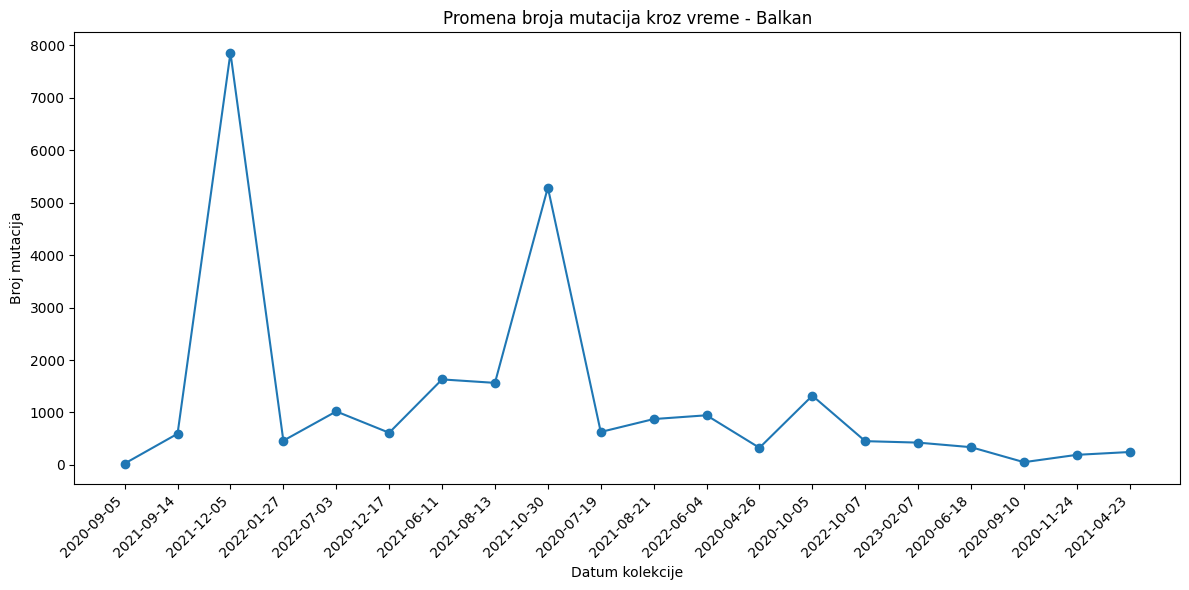

In [10]:
import os
import csv
from dateutil import parser
import matplotlib.pyplot as plt

def analiziraj_promene_mutacija_za_celi_balkan(balkan_direktorijum):
    # Inicijalizacija strukture za praćenje broja mutacija po datumu
    mutacije_po_datumu = {}

    # Iteriranje kroz poddirektorijume
    for drzava_direktorijum in os.listdir(balkan_direktorijum):
        puna_putanja = os.path.join(balkan_direktorijum, drzava_direktorijum)
        if os.path.isdir(puna_putanja):
            for csv_fajl in os.listdir(puna_putanja):
                if csv_fajl.startswith("povezivanje_sa_tsv_") and csv_fajl.endswith(".csv"):
                    csv_fajl_putanja = os.path.join(puna_putanja, csv_fajl)

                    # Učitavanje CSV fajla
                    with open(csv_fajl_putanja, mode='r', newline='', encoding='utf-8') as csv_file:
                        csv_reader = csv.reader(csv_file)
                        zaglavlje = next(csv_reader)

                        # Pronalaženje indeksa kolona
                        datum_kolekcije_indeks = zaglavlje.index('Collection date')

                        # Čitanje i sortiranje podataka prema datumu kolekcije
                        podaci = list(csv_reader)
                        podaci.sort(key=lambda x: parser.parse(x[datum_kolekcije_indeks]))

                        # Praćenje broja mutacija po datumu
                        for red in podaci:
                            datum_kolekcije = parser.parse(red[datum_kolekcije_indeks]).strftime('%Y-%m-%d')
                            broj_mutacija = sum(1 for pozicija in red[4:] if pozicija != '0' and pozicija.isdigit())
                            mutacije_po_datumu.setdefault(datum_kolekcije, []).append(broj_mutacija)

    # Vizualizacija promene broja mutacija kroz vreme za ceo Balkan
    datumi = list(mutacije_po_datumu.keys())
    broj_mutacija_po_datumu = [sum(mutacije_po_datumu[datum]) for datum in datumi]

    # Povećanje veličine slike
    plt.figure(figsize=(12, 6))

    # Određivanje broja datuma koje želimo prikazati
    broj_datuma = min(20, len(datumi))

    # Prikazivanje samo svakog drugog datuma
    koraci = max(len(datumi) // broj_datuma, 1)
    prikazani_datumi = datumi[::koraci]
    prikazani_brojevi_mutacija = broj_mutacija_po_datumu[::koraci]

    plt.plot(prikazani_datumi, prikazani_brojevi_mutacija, marker='o')

    plt.title('Promena broja mutacija kroz vreme - Balkan')
    plt.xlabel('Datum kolekcije')
    plt.ylabel('Broj mutacija')
    plt.xticks(rotation=45, ha='right')

    # Poboljšanje rasporeda elemenata na grafu
    plt.tight_layout()

    # Prikazivanje grafika
    plt.show()

# Direktorijum "Balkan"
cwd = os.getcwd()
balkan_direktorijum = os.path.abspath(os.path.join(cwd, os.pardir))
balkan_direktorijum += '\Drzave'

# Pozivanje funkcije za analizu i vizualizaciju promene broja mutacija za ceo Balkan
analiziraj_promene_mutacija_za_celi_balkan(balkan_direktorijum)


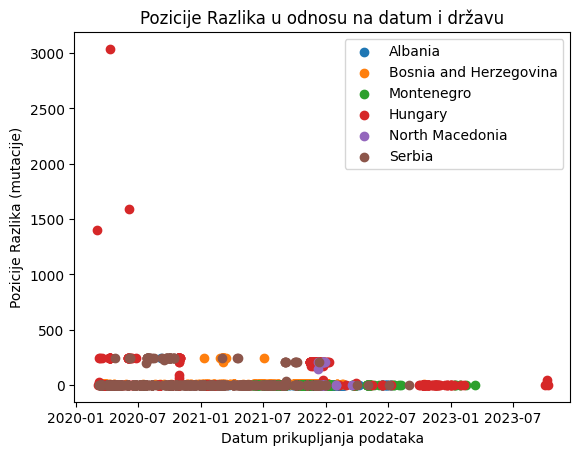

Index(['Location', 'Collection date', 'PozicijeRazlika', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11',
       ...
       'Unnamed: 619', 'Unnamed: 620', 'Unnamed: 621', 'Unnamed: 622',
       'Unnamed: 623', 'Unnamed: 624', 'Unnamed: 625', 'Unnamed: 626',
       'Unnamed: 627', 'Unnamed: 628'],
      dtype='object', length=627)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Postavi putanju do novog CSV fajla
csv_path = 'sve_povezane_informacije_izmenjeno.csv'

# Učitaj podatke iz CSV fajla u DataFrame
data = pd.read_csv(csv_path)

# Izdvoji relevantne informacije
relevantne_kolone = ['Location', 'Collection date', 'PozicijeRazlika'] + [kolona for kolona in data.columns if kolona.startswith('Unnamed')]
podaci_za_analizu = data[relevantne_kolone]

# Ukloni redove sa nedostajućim vrednostima
podaci_za_analizu = podaci_za_analizu.dropna(subset=['Location', 'Collection date', 'PozicijeRazlika'])

# Pretvori "Collection date" u datetime format
podaci_za_analizu['Collection date'] = pd.to_datetime(podaci_za_analizu['Collection date'], format='mixed')

# Prikazi podatke na grafiku
for drzava in podaci_za_analizu['Location'].unique():
    podaci_drzava = podaci_za_analizu[podaci_za_analizu['Location'] == drzava]
    plt.scatter(podaci_drzava['Collection date'], podaci_drzava['PozicijeRazlika'], label=drzava)

# Podesi oznake i prikaži legendu
plt.xlabel('Datum prikupljanja podataka')
plt.ylabel('Pozicije Razlika (mutacije)')
plt.title('Pozicije Razlika u odnosu na datum i državu')
plt.legend()
plt.show()

# Ako želiš prikazati kolone nakon analize
print(podaci_za_analizu.columns)


In [36]:
import pandas as pd
import plotly.express as px

# Postavi putanju do novog CSV fajla
csv_path = 'sve_povezane_informacije_izmenjeno.csv'

# Učitaj novi CSV fajl
data = pd.read_csv(csv_path)

# Izdvoji relevantne informacije
relevantne_kolone = ['Location', 'Collection date', 'PozicijeRazlika'] + [kolona for kolona in data.columns if kolona.startswith('Unnamed')]
podaci_za_analizu = data[relevantne_kolone]

# Ukloni redove sa nedostajućim vrednostima
podaci_za_analizu = podaci_za_analizu.dropna(subset=['Location', 'Collection date', 'PozicijeRazlika'])

# Pretvori "Collection date" u datetime format
podaci_za_analizu['Collection date'] = pd.to_datetime(podaci_za_analizu['Collection date'], format='mixed')

# Podesi veličinu tačaka za bolju vidljivost
podaci_za_analizu['Veličina_tačaka'] = 100

# Prikazi interaktivni 3D grafik
fig = px.scatter_3d(podaci_za_analizu, x='Collection date', y='PozicijeRazlika', z='Location', size='Veličina_tačaka',
                    color='Location', opacity=0.7, title='Pozicije Razlika u odnosu na datum i državu')

# Podešavanje oznaka
fig.update_layout(scene=dict(xaxis_title='Datum prikupljanja podataka',
                             yaxis_title='Pozicije Razlika (mutacije)',
                             zaxis_title='Država'))

# Postavljanje prazne liste za oznake
fig.update_layout(legend_title_text='')

# Povećaj veličinu grafika
fig.update_layout(width=1000, height=800)

# Prikazivanje interaktivnog grafika
fig.show()

In [19]:
!pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import plotly.express as px

# Postavi putanju do novog CSV fajla
csv_path = 'sve_povezane_informacije_izmenjeno.csv'

# Učitaj novi CSV fajl
data = pd.read_csv(csv_path)

# Izdvoji relevantne informacije
relevantne_kolone = ['Location', 'Collection date']
podaci_za_analizu = data[relevantne_kolone]

# Ukloni redove sa nedostajućim vrednostima
podaci_za_analizu = podaci_za_analizu.dropna(subset=['Location', 'Collection date'])

# Pretvori "Collection date" u datetime format
podaci_za_analizu['Collection date'] = pd.to_datetime(podaci_za_analizu['Collection date'], format='mixed')

# Prikazi interaktivni line dijagram
fig = px.line(podaci_za_analizu, x='Collection date', y='Location', color='Location',
              title='Datum kada je virus bio u kojim državama',
              labels={'Location': 'Država', 'Collection date': 'Datum prikupljanja podataka'})

# Povećaj veličinu grafika
fig.update_layout(width=1000, height=800)

# Prikazivanje interaktivnog grafika
fig.show()

In [39]:
import pandas as pd
import plotly.graph_objects as go

# Postavi putanju do novog CSV fajla
csv_path = 'sve_povezane_informacije_izmenjeno.csv'

# Učitaj novi CSV fajl
data = pd.read_csv(csv_path)

# Izdvoji relevantne informacije
relevantne_kolone = ['Location', 'Collection date']
podaci_za_analizu = data[relevantne_kolone]

# Ukloni redove sa nedostajućim vrednostima
podaci_za_analizu = podaci_za_analizu.dropna(subset=['Location', 'Collection date'])

# Pretvori "Collection date" u datetime format
podaci_za_analizu['Collection date'] = pd.to_datetime(podaci_za_analizu['Collection date'], format='mixed')

# Sortiraj podatke po datumu
podaci_za_analizu = podaci_za_analizu.sort_values(by='Collection date')

# Prikazi interaktivni line dijagram
fig = go.Figure()

# Dodaj tragove za svaku državu
for drzava in podaci_za_analizu['Location'].unique():
    podaci_za_drzavu = podaci_za_analizu[podaci_za_analizu['Location'] == drzava]
    fig.add_trace(go.Scatter(
        x=podaci_za_drzavu['Collection date'],
        y=[drzava] * len(podaci_za_drzavu),
        mode='lines+markers',
        name=drzava
    ))

# Podešavanje izgleda grafika
fig.update_layout(
    title='Putovanje virusa između država tokom vremena',
    xaxis=dict(title='Datum prikupljanja podataka'),
    yaxis=dict(title='Država'),
    width=1000,
    height=800
)

# Prikazivanje interaktivnog grafika
fig.show()